## Content

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

####  Time - No.of secs elapsed between first and last transaction
####   V1-V28 - Some sensitive info about customers, used PCA to convert features into numerical values
####   Amount - Transaction Amount
####   Class - Legit Transaction (0) / Fraud Transaction (1)


In [2]:
!pip install xgboost


## 1. Loading Modules

In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,f1_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams


## 2. Loading Dataset

In [83]:
df=pd.read_csv("Credit_card.csv")
df.shape

(284807, 31)

In [84]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [85]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 3. Dataset Information

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 4. Bit Of EDA

In [87]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [88]:
df.isnull().sum()
#No null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [117]:
trans_type_viz=((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
print(trans_type_viz)

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

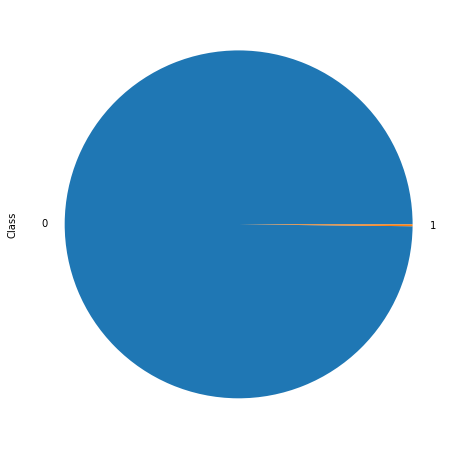

In [118]:
# Pie Ratio Share Between Legit and Normal Transactions
trans_type_viz.plot.pie()

In [90]:
#Checking the correlation.....
corr=df.corr()

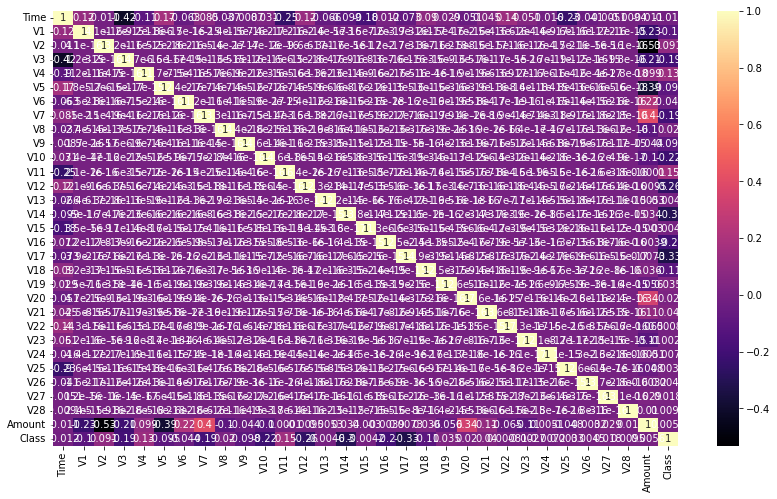

In [119]:
#Checking the correlation.....
rcParams['figure.figsize'] = 14, 8
sns.heatmap(corr, cmap="magma", annot=True)
plt.show()


Number of Legit Transactions---> (284315, 31)
Number of Fraud Transactions---> (492, 31)


<AxesSubplot:xlabel='Class', ylabel='count'>

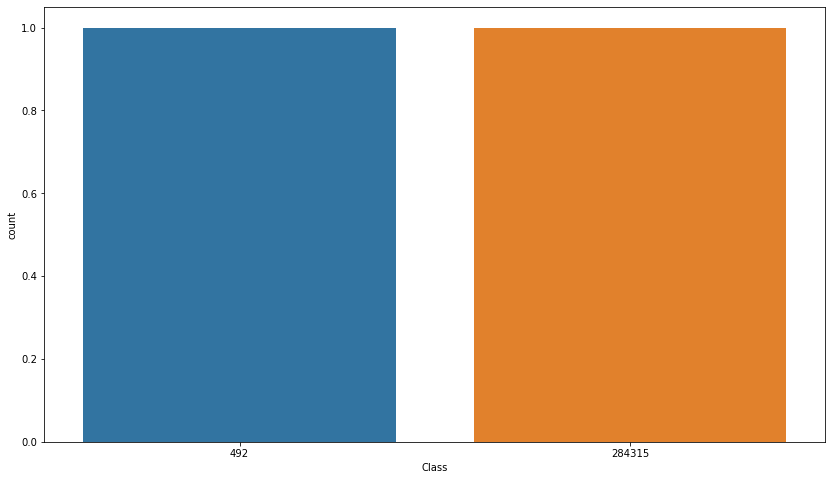

In [93]:
legit = df[df['Class']==0]
fraud = df[df['Class']==1]
print("Number of Legit Transactions--->",  legit.shape)
print("Number of Fraud Transactions--->",  fraud.shape)
#Just to visualize 
new_class=df['Class'].value_counts()
sns.countplot(new_class)

## 5. Preparing Data

In [94]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

## 6. Preprocessing-Scaling

In [99]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = sc.fit_transform(X)

## 7. Data Split

In [100]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 0)

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
y.head()

In [ ]:
y.shape

## 8. Class Imbalance--Model Fiiting--Performance Evaluation

In [107]:
X_resam, y_resam = SMOTE().fit_resample(X_train, y_train)

In [108]:
model_Log = LogisticRegression()
# training
model_Log.fit(X_resam, y_resam)
# testing
y_pred = model_Log.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[55857  1004]
 [   11    90]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.89      0.15       101

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

F1 Score: 0.15062761506276154


In [109]:
model_knn = KNeighborsClassifier(n_neighbors=5)
# training
model_knn.fit(X_resam, y_resam)
# testing
y_pred = model_knn.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[53648  3213]
 [   46    55]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.94      0.97     56861
           1       0.02      0.54      0.03       101

    accuracy                           0.94     56962
   macro avg       0.51      0.74      0.50     56962
weighted avg       1.00      0.94      0.97     56962

F1 Score: 0.032650638171564265


In [110]:
model_dt_gini = DecisionTreeClassifier(criterion='gini')
# training
model_dt_gini.fit(X_resam, y_resam)
# testing
y_pred = model_dt_gini.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56773    88]
 [   21    80]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.48      0.79      0.59       101

    accuracy                           1.00     56962
   macro avg       0.74      0.90      0.80     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.5947955390334573


In [111]:
model_dt_ent = DecisionTreeClassifier(criterion='entropy')
# training
model_dt_ent.fit(X_resam, y_resam)
# testing
y_pred = model_dt_ent.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56759   102]
 [   15    86]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.46      0.85      0.60       101

    accuracy                           1.00     56962
   macro avg       0.73      0.92      0.80     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.5951557093425606


In [113]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
# training
model_rf.fit(X_resam, y_resam)
# testing
y_pred = model_rf.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56847    14]
 [   15    86]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.85      0.86       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.8557213930348259


In [112]:
model_xg = XGBClassifier(n_jobs=0)
# training
model_xg.fit(X_resam, y_resam)
# testing
y_pred = model_xg.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56843    18]
 [   12    89]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.83      0.88      0.86       101

    accuracy                           1.00     56962
   macro avg       0.92      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.8557692307692306


## 9. Without Class Imbalance--Model Fiiting--Performance Evaluation

In [101]:
model_Log = LogisticRegression()
# training
model_Log.fit(X_train, y_train)
# testing
y_pred = model_Log.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56836    25]
 [   33    68]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.73      0.67      0.70       101

    accuracy                           1.00     56962
   macro avg       0.87      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.7010309278350516


In [102]:
model_knn = KNeighborsClassifier(n_neighbors=5)
# training
model_knn.fit(X_train, y_train)
# testing
y_pred = model_knn.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56861     0]
 [   96     5]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       1.00      0.05      0.09       101

    accuracy                           1.00     56962
   macro avg       1.00      0.52      0.55     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.09433962264150944


In [103]:
model_dt_gini = DecisionTreeClassifier(criterion='gini')
# training
model_dt_gini.fit(X_train, y_train)
# testing
y_pred = model_dt_gini.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56838    23]
 [   25    76]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.77      0.75      0.76       101

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.76


In [78]:
model_dt_ent = DecisionTreeClassifier(criterion='entropy')
# training
model_dt_ent.fit(X_train, y_train)
# testing
y_pred = model_dt_ent.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56840    21]
 [   20    81]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.80      0.80       101

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.7980295566502462


In [106]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
# training
model_rf.fit(X_train, y_train)
# testing
y_pred = model_rf.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56854     7]
 [   22    79]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.8449197860962566


In [104]:
model_xg = XGBClassifier(n_jobs=0)
# training
model_xg.fit(X_train, y_train)
# testing
y_pred = model_xg.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Confusion Matrix: [[56856     5]
 [   17    84]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.83      0.88       101

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.8842105263157894


## CONCLUSION
1. Number of Legit Transactions--->284315(99.827251)
2. Number of Fraud Transactions--->492(0.172749)

***The best classification model for the above scenario :----
1. Without Imbalance -- Xgb Classifier (F1 Score -> 0.8557692307692306) ->> Best Model.
2. With Imbalance -- Xgb Classifier (F1 Score -> 0.8842105263157894) ->> Best Model.